<a href="https://colab.research.google.com/github/Rhayem1920/First-End-to-End-ML-Project/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup Environment:

 To understand Decision Trees, let’s just build one and take a look at how it makes predictions.

In [ ]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
# To plot pretty figures

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
font = {'family' : 'monospace',
          'weight' : 'bold',
          'size'   : 15}
mpl.rc('font', **font)
 # common EDa and ML librairies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn


In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
X,y=iris.data[:,2:],iris.target
pd.DataFrame(X)

,0,1
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [ ]:
pd.DataFrame(y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree_clf=DecisionTreeClassifier(max_depth=2,random_state=42)
dec_tree_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

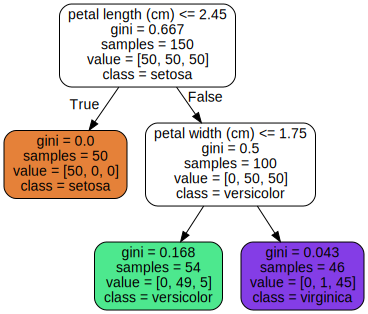

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz
export_graphviz(dec_tree_clf,feature_names=iris.feature_names[2:],class_names=iris.target_names,filled=True,rounded=True,out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"))
Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

## Making Predictions
 Let’s see how the tree represented in  makes predictions. Suppose you find
an iris flower and you want to classify it. You start at the root node (depth 0, at the
top): this node asks whether the flower’s petal length is smaller than 2.45 cm. If it is,
then you move down to the root’s left child node (depth 1, left). In this case, it is a leaf
node (i.e., it does not have any children nodes), so it does not ask any questions: you
can simply look at the predicted class for that node and the Decision Tree predicts
that your flower is an Iris-Setosa ( class=setosa ).
Now suppose you find another flower, but this time the petal length is greater than
2.45 cm. You must move down to the root’s right child node (depth 1, right), which is
not a leaf node, so it asks another question: is the petal width smaller than 1.75 cm? If
it is, then your flower is most likely an Iris-Versicolor (depth 2, left). If not, it is likely
an Iris-Virginica (depth 2, right). It’s really that simple.


**N.B**: One of the many qualities of Decision Trees is that they require
very little data preparation. In particular, they don’t require feature
scaling or centering at all.

A node’s samples attribute counts how many training instances it applies to. For
example, 100 training instances have a petal length greater than 2.45 cm (depth 1,
right), among which 54 have a petal width smaller than 1.75 cm (depth 2, left). A
node’s value attribute tells you how many training instances of each class this node
applies to: for example, the bottom-right node applies to 0 Iris-Setosa, 1 Iris-
Versicolor, and 45 Iris-Virginica. Finally, a node’s gini attribute measures its impur‐
ity: a node is “pure” ( gini=0 ) if all training instances it applies to belong to the same
class. For example, since the depth-1 left node applies only to Iris-Setosa training
instances, it is pure and its gini score is 0. Equation 6-1 shows how the training algo‐
rithm computes the gini score G i of the i th node. For example, the depth-2 left node
has a gini score equal to 1 – (0/54)² – (49/54)²– (5/54)² ≈ 0.168. Another impurity
measure is discussed shortly.
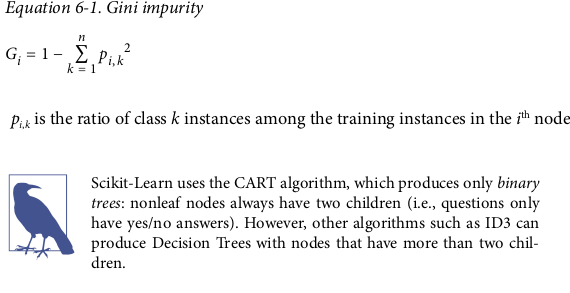

Text(4.05, 0.5, '(Depth=2)')

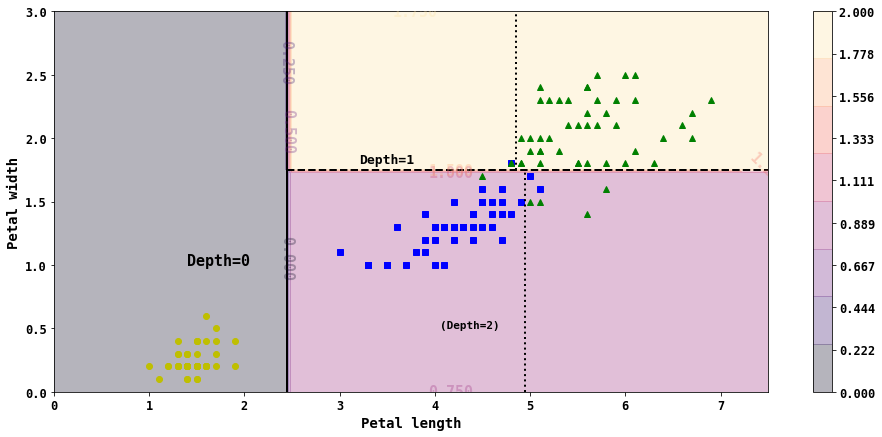

In [ ]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
  # pipeline for every contourf plot: 
  #begin
    breaks=np.linspace(0,2,10)
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s) # x1:identical rows of x1s ; x2=identical columns of x2
    X_new = np.c_[x1.ravel(), x2.ravel()] #x1.ravel()=x1s & X_new=(column1=x1s*100,column2=every term in x2s repeated 100)
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = 'magma'
    CF=plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    plt.colorbar(ticks=breaks,orientation='vertical')
    plt.clabel(CF,inline=1)
    #end
    if not iris:
        custom_cmap2 = 'jet'
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14,fontdict=font)
        plt.ylabel("Petal width", fontsize=14,fontdict=font)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(16, 7))
plot_decision_boundary(dec_tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)


As you can see Decision Trees are fairly intuitive and their decisions are easy to interpret. Such models are often called white box models. In contrast, as we will see, Ran‐
dom Forests or neural networks are generally considered black box models. They
make great predictions, and you can easily check the calculations that they performed
to make these predictions; nevertheless, it is usually hard to explain in simple terms
why the predictions were made. For example, if a neural network says that a particu‐
lar person appears on a picture, it is hard to know what actually contributed to this
prediction: did the model recognize that person’s eyes? Her mouth? Her nose? Her
shoes? Or even the couch that she was sitting on? Conversely, Decision Trees provide
nice and simple classification rules that can even be applied manually if need be (e.g.,
for flower classification)
### Estimating Class Probabilities

 A Decision Tree can also estimate the probability that an instance belongs to a particular class k: first it traverses the tree to find the leaf node for this instance, and then it
returns the ratio of training instances of class k in this node. For example, suppose
you have found a flower whose petals are 5 cm long and 1.5 cm wide. The corre‐
sponding leaf node is the depth-2 left node, so the Decision Tree should output the
following probabilities: 0% for Iris-Setosa (0/54), 90.7% for Iris-Versicolor (49/54),
and 9.3% for Iris-Virginica (5/54). And of course if you ask it to predict the class, it
should output Iris-Versicolor (class 1) since it has the highest probability.

In [ ]:
dec_tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [ ]:
dec_tree_clf.predict([[5, 1.5]])

array([1])

###The CART Training Algorithm
 Scikit-Learn uses the Classification And Regression Tree (CART) algorithm to train
Decision Trees (also called “growing” trees). The idea is really quite simple: the algorithm first splits the training set in two subsets using a single feature k and a thres‐
hold t k (e.g., “petal length ≤ 2.45 cm”). How does it choose k and t k ? It searches for the
pair (k, t k ) that produces the purest subsets (weighted by their size). The cost function that the algorithm tries to minimize is given by


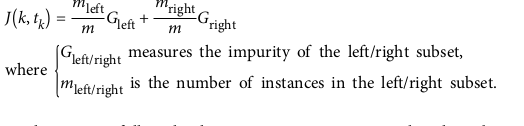

Once it has successfully split the training set in two, it splits the subsets using the
same logic, then the sub-subsets and so on, recursively. It stops recursing once it reaches the maximum depth (defined by the max_depth hyperparameter), or if it cannot
find a split that will reduce impurity. A few other hyperparameters (described in a
moment) control additional stopping conditions ( min_samples_split , min_sam
ples_leaf , min_weight_fraction_leaf , and max_leaf_nodes ).

the CART algorithm is a greedy algorithm: it greedily searches for an optimum split at the top level, then repeats the
process at each level. It does not check whether or not the split will
lead to the lowest possible impurity several levels down. A greedy
algorithm often produces a reasonably good solution, but it is not
guaranteed to be the optimal solution.
Unfortunately, finding the optimal tree is known to be an NP-
Complete problem: 2 it requires O(exp(m)) time, making the problem intractable even for fairly small training sets. This is why we
must settle for a “reasonably good” solution.

### Regularization Hyperparameters

Decision Trees make very few assumptions about the training data (as opposed to lin‐
ear models, which obviously assume that the data is linear, for example). If left
unconstrained, the tree structure will adapt itself to the training data, fitting it very
closely, and most likely overfitting it. Such a model is often called a nonparametric
model, not because it does not have any parameters (it often has a lot) but because the
number of parameters is not determined prior to training, so the model structure is
free to stick closely to the data. In contrast, a parametric model such as a linear model
has a predetermined number of parameters, so its degree of freedom is limited,
reducing the risk of overfitting (but increasing the risk of underfitting).


To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom
during training. As you know by now, this is called regularization. The regularization
hyperparameters depend on the algorithm used, but generally you can at least restrict
the maximum depth of the Decision Tree. In Scikit-Learn, this is controlled by the
max_depth hyperparameter (the default value is None , which means unlimited).
Reducing max_depth will regularize the model and thus reduce the risk of overfitting.


The DecisionTreeClassifier class has a few other parameters that similarly restrict
the shape of the Decision Tree: min_samples_split (the minimum number of sam‐
ples a node must have before it can be split), min_samples_leaf (the minimum number of samples a leaf node must have), min_weight_fraction_leaf (same as
min_samples_leaf but expressed as a fraction of the total number of weighted
instances), max_leaf_nodes (maximum number of leaf nodes), and max_features
(maximum number of features that are evaluated for splitting at each node). Increasing min_* hyperparameters or reducing max_* hyperparameters will regularize the
model.


Other algorithms work by first training the Decision Tree without
restrictions, then pruning (deleting) unnecessary nodes. A node
whose children are all leaf nodes is considered unnecessary if the
purity improvement it provides is not statistically significant. Stan‐
dard statistical tests, such as the χ 2 test, are used to estimate the
probability that the improvement is purely the result of chance
(which is called the null hypothesis). If this probability, called the p-
value, is higher than a given threshold (typically 5%, controlled by
a hyperparameter), then the node is considered unnecessary and its
children are deleted. The pruning continues until all unnecessary
nodes have been pruned.

Text(0, 0.5, '')

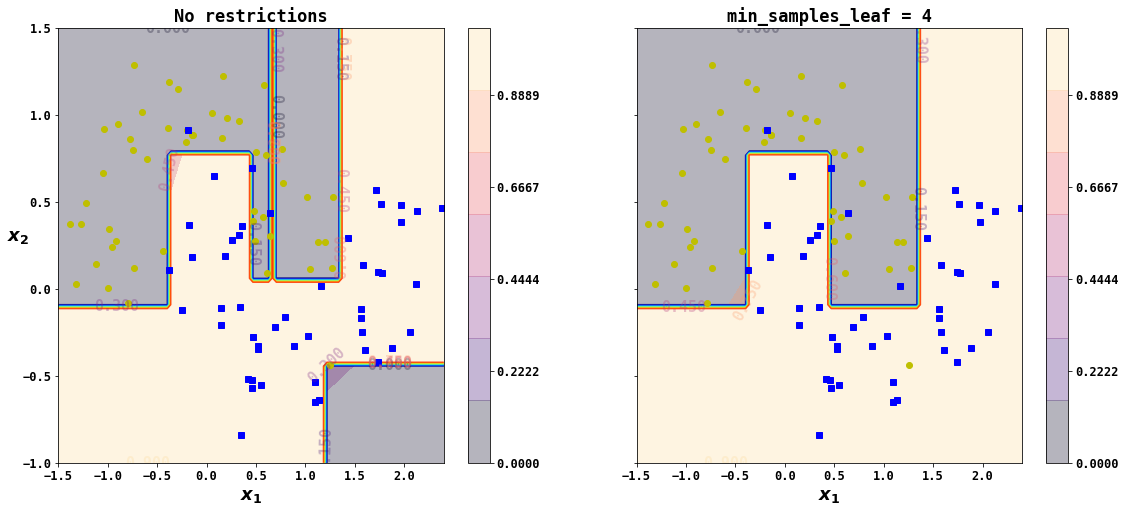

In [ ]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(19, 8), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=17,fontdict=font)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=17,fontdict=font)
plt.ylabel("")

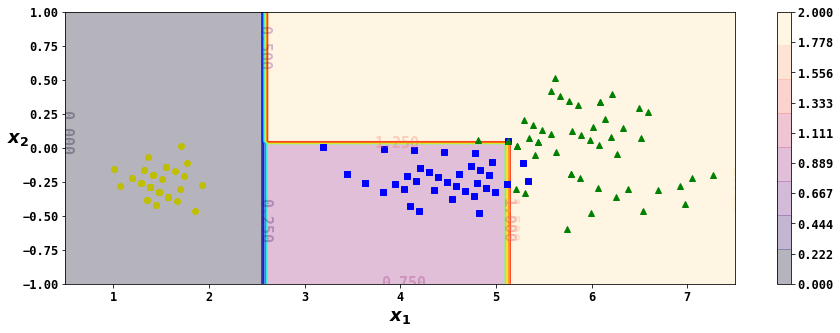

In [ ]:
#Rotating the dataset also leads to completely different decision boundaries:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(15, 5))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

On the left, the Decision Tree is trained with the default hyperparameters
(i.e., no restrictions), and on the right the Decision Tree is trained with min_sam
ples_leaf=4 . It is quite obvious that the model on the left is overfitting, and the
model on the right will probably generalize better.

## Regression
Decision Trees are also capable of performing regression tasks.

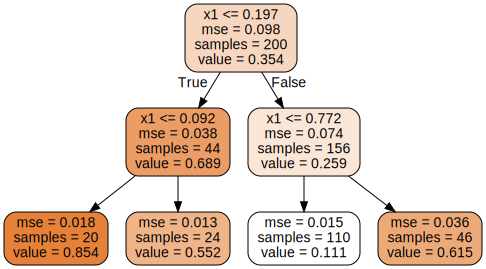

In [ ]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)
# export graphviz
export_graphviz(
        tree_reg1,
        out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )


Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))



This tree looks very similar to the classification tree you built earlier. The main differ‐
ence is that instead of predicting a class in each node, it predicts a value. For example,
suppose you want to make a prediction for a new instance with x 1 = 0.6. You traverse
the tree starting at the root, and you eventually reach the leaf node that predicts
value=0.1106 . This prediction is simply the average target value of the 110 training
instances associated to this leaf node. This prediction results in a Mean Squared Error
(MSE) equal to 0.0151 over these 110 instances.

Text(0.5, 1.0, 'max_depth=3')

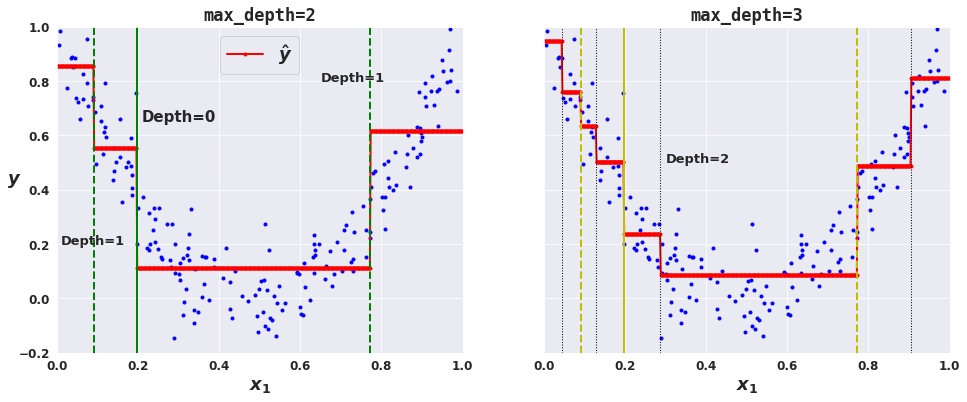

In [83]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")
    sns.set_style('darkgrid')

fig, axes = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "g-"), (0.0917, "g--"), (0.7718, "g--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=17,fontdict=font)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "y-"), (0.0917, "y--"), (0.7718, "y--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)

plt.title("max_depth=3", fontsize=17,fontdict=font)

If you set

max_depth=3 , you get the predictions represented on the right. Notice how the predicted value for each region is always the average target value of the instances in that
region. The algorithm splits each region in a way that makes most training instances as close as possible to that predicted value.


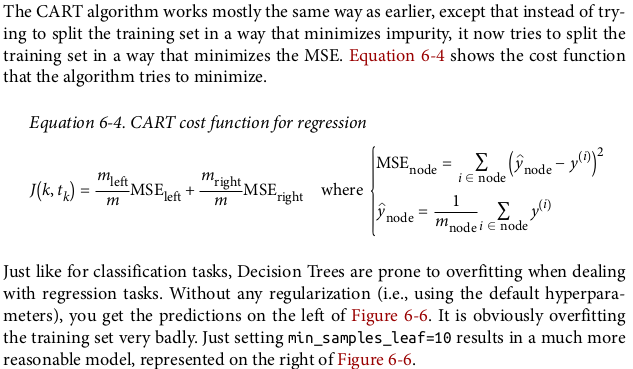

Text(0.5, 1.0, 'min_samples_leaf=10')

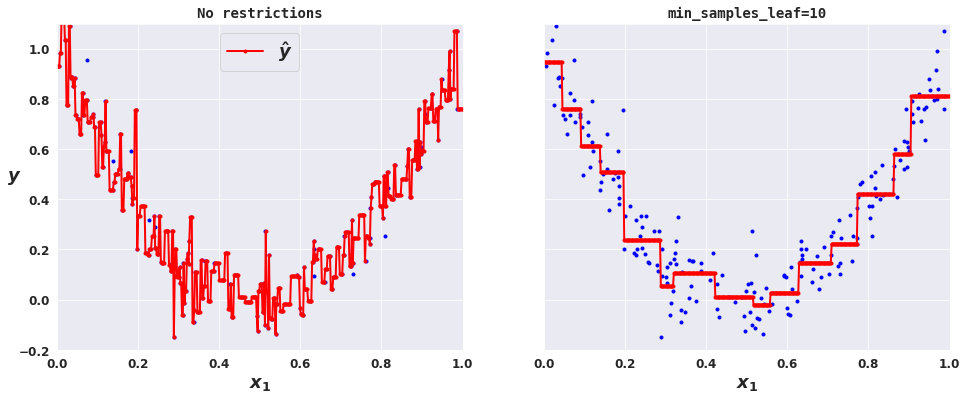

In [85]:
## Overfitting 
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)
sns.set_style('darkgrid')
plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14,fontdict=font)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14,fontdict=font)

Just like for classification tasks, Decision Trees are prone to overfitting when dealing
with regression tasks. Without any regularization (i.e., using the default hyperparameters), you get the predictions on the left. It is obviously overfitting
the training set very badly. Just setting min_samples_leaf=10 results in a much more
reasonable model, represented on the right.

Hopefully by now you are convinced that Decision Trees have a lot going for them:
they are simple to understand and interpret, easy to use, versatile, and powerful.
However they do have a few limitations. First, as you may have noticed, Decision
Trees love orthogonal decision boundaries (all splits are perpendicular to an axis),
which makes them sensitive to training set rotation. For example, Figure 6-7 shows a
simple linearly separable dataset: on the left, a Decision Tree can split it easily, while
on the right, after the dataset is rotated by 45°, the decision boundary looks unnecessarily convoluted. Although both Decision Trees fit the training set perfectly, it is very
likely that the model on the right will not generalize well. One way to limit this problem is to use PCA (see Chapter 8), which often results in a better orientation of the
training data.

More generally, the main issue with Decision Trees is that they are very sensitive to
small variations in the training data. For example, if you just remove the widest Iris-
Versicolor from the iris training set (the one with petals 4.8 cm long and 1.8 cm wide)
and train a new Decision Tree, you may get the model represented in Figure 6-8. As
you can see, it looks very different from the previous Decision Tree .
Actually, since the training algorithm used by Scikit-Learn is stochastic you may
get very different models even on the same training data (unless you set the
random_state hyperparameter).

Text(0, 0.5, '')

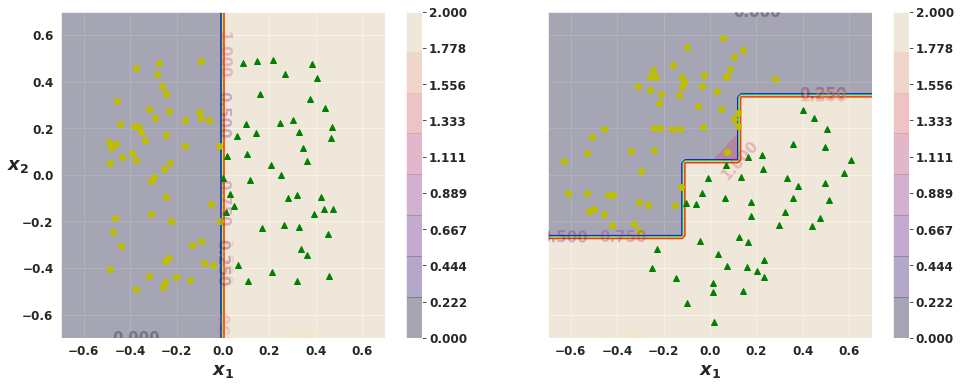

In [87]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")